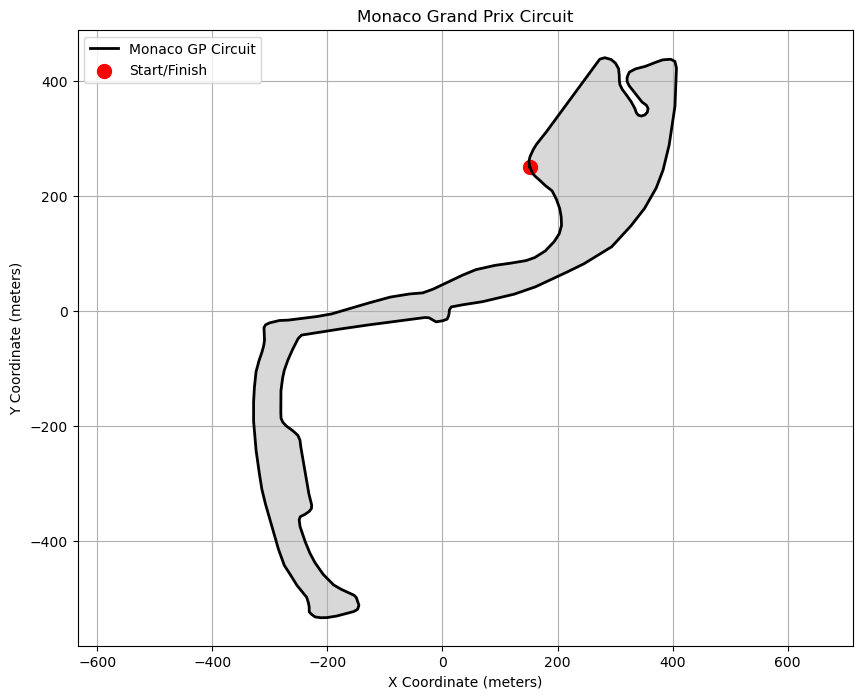

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Function to convert latitude and longitude to Cartesian coordinates
def latlon_to_xy(lat, lon, lat0, lon0):
    R = 6371000  # Earth's radius in meters
    x = R * np.radians(lon - lon0) * np.cos(np.radians(lat0))
    y = R * np.radians(lat - lat0)
    return x, y

# Load the GeoJSON data for the Monaco circuit
with open('mc-1929.geojson', 'r') as f:
    geojson_data = json.load(f)

# Extract coordinates from the GeoJSON data
coordinates = geojson_data['features'][0]['geometry']['coordinates']
lons, lats = zip(*coordinates)

# Reference point for coordinate conversion (mean latitude and longitude)
lat0, lon0 = np.mean(lats), np.mean(lons)

# Convert GPS coordinates to Cartesian coordinates
x, y = latlon_to_xy(np.array(lats), np.array(lons), lat0, lon0)

# Plot the Monaco Grand Prix Circuit
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'k-', linewidth=2, label='Monaco GP Circuit')
plt.fill(x, y, 'gray', alpha=0.3)
plt.scatter(x[0], y[0], color='red', s=100, label='Start/Finish')
plt.title('Monaco Grand Prix Circuit')
plt.xlabel('X Coordinate (meters)')
plt.ylabel('Y Coordinate (meters)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


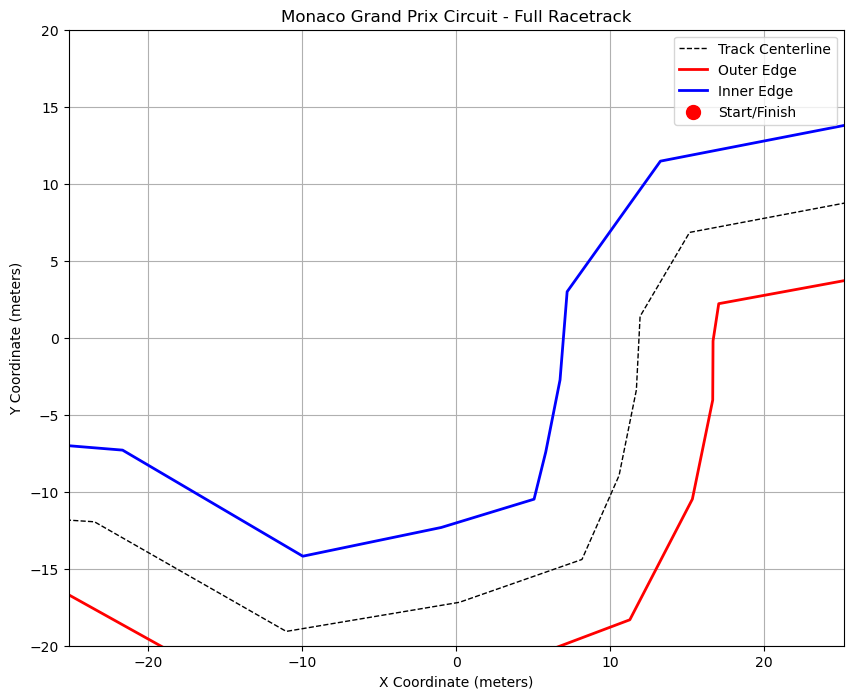

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Function to convert latitude and longitude to Cartesian coordinates
def latlon_to_xy(lat, lon, lat0, lon0):
    R = 6371000  # Earth's radius in meters
    x = R * np.radians(lon - lon0) * np.cos(np.radians(lat0))
    y = R * np.radians(lat - lat0)
    return x, y

# Function to compute unit perpendicular vectors
def compute_perpendiculars(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    lengths = np.sqrt(dx**2 + dy**2)
    
    # Normalize to unit vectors
    dx /= lengths
    dy /= lengths
    
    # Perpendicular vectors (rotate 90 degrees)
    px = -dy
    py = dx
    
    return px, py

# Load the GeoJSON data for the Monaco circuit
with open('mc-1929.geojson', 'r') as f:
    geojson_data = json.load(f)

# Extract coordinates from the GeoJSON data
coordinates = geojson_data['features'][0]['geometry']['coordinates']
lons, lats = zip(*coordinates)

# Reference point for coordinate conversion (mean latitude and longitude)
lat0, lon0 = np.mean(lats), np.mean(lons)

# Convert GPS coordinates to Cartesian coordinates
x, y = latlon_to_xy(np.array(lats), np.array(lons), lat0, lon0)

# Compute perpendicular vectors
px, py = compute_perpendiculars(x, y)

# Define track width (e.g., 10 meters)
track_width = 10  # Adjust as needed

# Compute inner and outer track boundaries
x_outer = x + (track_width / 2) * px
y_outer = y + (track_width / 2) * py
x_inner = x - (track_width / 2) * px
y_inner = y - (track_width / 2) * py

# Plot the Monaco Grand Prix Circuit with inner and outer edges
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'k--', linewidth=1, label='Track Centerline')
plt.plot(x_outer, y_outer, 'r-', linewidth=2, label='Outer Edge')
plt.plot(x_inner, y_inner, 'b-', linewidth=2, label='Inner Edge')
# plt.fill_betweenx(y, x_inner, x_outer, color='gray', alpha=0.3, label='Track Surface')

plt.scatter(x[0], y[0], color='red', s=100, label='Start/Finish')
plt.title('Monaco Grand Prix Circuit - Full Racetrack')
plt.xlabel('X Coordinate (meters)')
plt.ylabel('Y Coordinate (meters)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.xlim(-20, 20)
plt.ylim(-20,20)
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


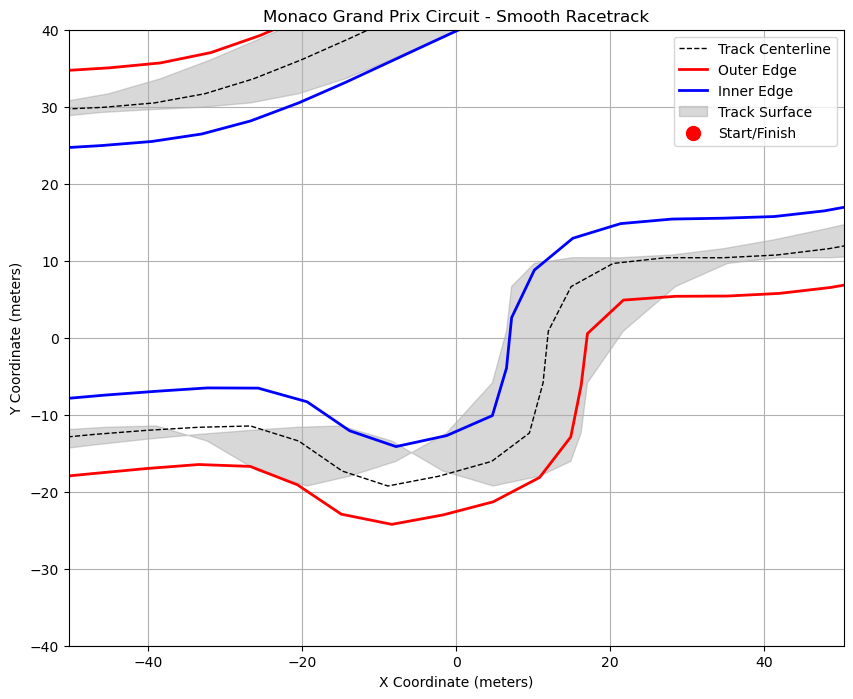

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Function to convert latitude and longitude to Cartesian coordinates
def latlon_to_xy(lat, lon, lat0, lon0):
    R = 6371000  # Earth's radius in meters
    x = R * np.radians(lon - lon0) * np.cos(np.radians(lat0))
    y = R * np.radians(lat - lat0)
    return x, y

# Function to compute perpendicular vectors for track width
def compute_perpendiculars(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    lengths = np.sqrt(dx**2 + dy**2)

    # Normalize to unit vectors
    dx /= lengths
    dy /= lengths

    # Perpendicular vectors (rotate 90 degrees)
    px = -dy
    py = dx

    return px, py

# Function to apply B-spline smoothing
def smooth_curve(x, y, num_points=500, smoothing_factor=0):
    tck, u = splprep([x, y], s=smoothing_factor, per=True)  # Closed loop track
    u_fine = np.linspace(0, 1, num_points)
    x_smooth, y_smooth = splev(u_fine, tck)
    return x_smooth, y_smooth

# Load the GeoJSON data for the Monaco circuit
with open('mc-1929.geojson', 'r') as f:
    geojson_data = json.load(f)

# Extract coordinates from the GeoJSON data
coordinates = geojson_data['features'][0]['geometry']['coordinates']
lons, lats = zip(*coordinates)

# Reference point for coordinate conversion (mean latitude and longitude)
lat0, lon0 = np.mean(lats), np.mean(lons)

# Convert GPS coordinates to Cartesian coordinates
x, y = latlon_to_xy(np.array(lats), np.array(lons), lat0, lon0)

# Smooth the centerline curve
x_smooth, y_smooth = smooth_curve(x, y, num_points=500, smoothing_factor=2)

# Compute perpendicular vectors on the smoothed curve
px, py = compute_perpendiculars(x_smooth, y_smooth)

# Define track width (e.g., 10 meters)
track_width = 10  # Adjust as needed

# Compute inner and outer track boundaries
x_outer = x_smooth + (track_width / 2) * px
y_outer = y_smooth + (track_width / 2) * py
x_inner = x_smooth - (track_width / 2) * px
y_inner = y_smooth - (track_width / 2) * py

# Smooth inner and outer curves
x_outer, y_outer = smooth_curve(x_outer, y_outer, num_points=500, smoothing_factor=2)
x_inner, y_inner = smooth_curve(x_inner, y_inner, num_points=500, smoothing_factor=2)

# Plot the Monaco Grand Prix Circuit with smoothed inner and outer edges
plt.figure(figsize=(10, 8))
plt.plot(x_smooth, y_smooth, 'k--', linewidth=1, label='Track Centerline')
plt.plot(x_outer, y_outer, 'r-', linewidth=2, label='Outer Edge')
plt.plot(x_inner, y_inner, 'b-', linewidth=2, label='Inner Edge')
plt.fill_betweenx(y_smooth, x_inner, x_outer, color='gray', alpha=0.3, label='Track Surface')

plt.scatter(x_smooth[0], y_smooth[0], color='red', s=100, label='Start/Finish')
plt.title('Monaco Grand Prix Circuit - Smooth Racetrack')
plt.xlabel('X Coordinate (meters)')
plt.ylabel('Y Coordinate (meters)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.xlim(-40, 40)
plt.ylim(-40, 40)
plt.show()

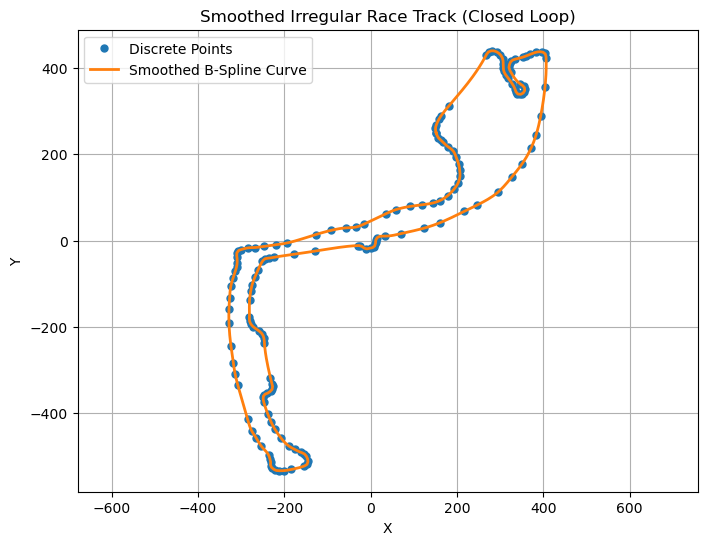

In [40]:
# Irregular loop of points
import json
import numpy as np
import matplotlib.pyplot as plt

# Function to convert latitude and longitude to Cartesian coordinates
def latlon_to_xy(lat, lon, lat0, lon0):
    R = 6371000  # Earth's radius in meters
    x = R * np.radians(lon - lon0) * np.cos(np.radians(lat0))
    y = R * np.radians(lat - lat0)
    return x, y

# Function to compute unit perpendicular vectors
def compute_perpendiculars(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    lengths = np.sqrt(dx**2 + dy**2)
    
    # Normalize to unit vectors
    dx /= lengths
    dy /= lengths
    
    # Perpendicular vectors (rotate 90 degrees)
    px = -dy
    py = dx
    
    return px, py

# Load the GeoJSON data for the Monaco circuit
with open('mc-1929.geojson', 'r') as f:
    geojson_data = json.load(f)

# Extract coordinates from the GeoJSON data
coordinates = geojson_data['features'][0]['geometry']['coordinates']
lons, lats = zip(*coordinates)

# Reference point for coordinate conversion (mean latitude and longitude)
lat0, lon0 = np.mean(lats), np.mean(lons)

# Convert GPS coordinates to Cartesian coordinates
x, y = latlon_to_xy(np.array(lats), np.array(lons), lat0, lon0)


# Apply B-spline interpolation with periodic boundary condition (per=True)
tck, u = splprep([x, y], s=0, per=True)

# Generate smooth points
u_fine = np.linspace(0, 1, 500)
x_smooth, y_smooth = splev(u_fine, tck)

# Plot the smoothed track and the discrete points
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Discrete Points', markersize=5)
plt.plot(x_smooth, y_smooth, '-', label='Smoothed B-Spline Curve', linewidth=2)
plt.title('Smoothed Irregular Race Track (Closed Loop)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

The closest point on the curve is: (3, 7)
The minimum distance is: 1.118033988749895


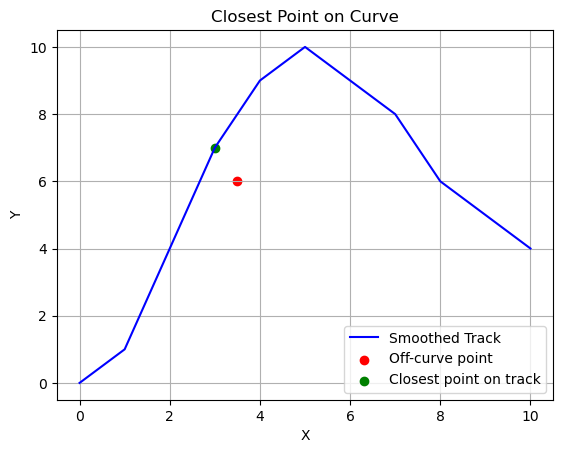

In [41]:
import numpy as np

# Example: Smooth curve points (x_smooth, y_smooth) and the off-curve point (px, py)
x_smooth = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_smooth = np.array([0, 1, 4, 7, 9, 10, 9, 8, 6, 5, 4])

# Example off-curve point (px, py)
px, py = 3.5, 6

# Function to find the closest point on the curve
def find_closest_point_on_curve(x_smooth, y_smooth, px, py):
    # Calculate the distances from the off-curve point to all points on the curve
    distances = np.sqrt((x_smooth - px)**2 + (y_smooth - py)**2)
    
    # Find the index of the minimum distance
    closest_index = np.argmin(distances)
    
    # Get the closest point on the curve
    closest_point = (x_smooth[closest_index], y_smooth[closest_index])
    
    return closest_point, distances[closest_index]

# Find the closest point on the curve
closest_point, min_distance = find_closest_point_on_curve(x_smooth, y_smooth, px, py)

print(f"The closest point on the curve is: {closest_point}")
print(f"The minimum distance is: {min_distance}")

# Plot the results
import matplotlib.pyplot as plt

plt.plot(x_smooth, y_smooth, label='Smoothed Track', color='blue')
plt.scatter(px, py, color='red', label='Off-curve point')
plt.scatter(closest_point[0], closest_point[1], color='green', label='Closest point on track')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Closest Point on Curve')
plt.grid(True)
plt.show()